DATASET Properati 142Mb

Primero lo importamos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import re

data_location = "Properati.csv"
data = pd.read_csv(data_location)
data_original = pd.read_csv(data_location)
data.head()
data['description'] = data['description'].astype(str)

In [2]:
#Definimos los patrones Regex
patron_m2 = '(\d{2,3})\,?\.?\d?\d?\s?([Mm]\.?\s?[2²]|metros)'
patron_amenities = r'([áa]reas? com[uú]ne?s?|amenities|[sz]um|gimnasio|solarium|sauna|g[iy]m|solarium)'
patron_portero = r'(porter[oa]s?|encargad[oa]s?|seren[oa]s?)'
patron_seguridad = r'(Seg\.?u?r?i?d?a?d? 24\s?ho?r?a?s|Prosegur|adt)'
patron_aptoprof = r'(Apto Prof\.?e?s?i?o?n?a?l?)'
patron_terraza = r'(terrazas?)'
patron_balcon = r'(balc[oó]ne?s?)'
patron_patio = r'(patios?|jard[ií]ne?s?|zonas? verdes?)'
patron_amb = r'((\d{1,2})\s?AMB)'
patron_dorm = r'((\d{1,2})\s?(hab|dorm|cuart))'
patron_disp = r'(frente|contrafrente|fondo|interno)'
patron_vista = r'(vista)'
patron_piso = r'((piso|planta)\:?\s? (\d{1,2})(\°|er|do|to|mo|vo|no|ro|ra|da|ta|ma|va|na|) |((\d{1,2})(\°|er|do|to|mo|vo|no|ro|ra|da|ta|ma|va|na|)\s?(piso|planta)|planta baja|primer piso|primera planta|segundo piso|segunda planta|tercer piso|tercera planta|cuarto piso|cuarta planta|quinto piso|quinta planta|sexto piso|sexta planta|s[ée]ptimo piso|s[ée]ptima planta|[úu]ltim[oa] (piso|planta)))'
patron_pozo = r'(pozo|construcci[oó]n|en obra)'
patron_baulera = r'(baulera|guardamuebles)'
patron_lavadero = r'(lavadero)'
patron_garage = r'(gara[jg]es?|cocheras?|estacionamientos?)'
patron_PH = r'(P\.?\s?H|Propi?e?d?a?d? hor)'
patron_precio = r'(U[S$][DS]?)\:?\s?((\d{5,8})\,?\d?\d?|(\d{2,3}\.\d{3})\,?\d?\d?|(\d{1,2}\.\d{3}\.\d{3})\,?\d?\d?)|((\d{5,8})\,?\d?\d?|(\d{2,3}\.\d{3})\,?\d?\d?|(\d{1,2}\.\d{3}\.\d{3})\,?\d?\d?)\s?(U[S$][DS]?|D[OÓ]LARES)'


121220 propiedades separadas en 26 campos. Averiguamos el tipo de campo

##columna de m2
m2_regex = re.compile(patron_m2)
data["m2_new"] = data["m2_new"].apply(lambda x: m2_regex.sub(cadena_reemplazo, x))

100.0    1126
50.0     1045
200.0     771
40.0      752
300.0     668
         ... 
757.0       1
657.0       1
732.0       1
773.0       1
526.0       1
Name: m2_new, Length: 723, dtype: int64


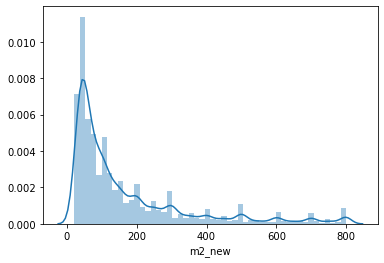

In [3]:
##columna de m2 entre 22 y 800m2
m2_regex = re.compile(patron_m2)
resultado_m2 = data['description'].apply(lambda x: m2_regex.search(x))
segresult_m2 = resultado_m2.apply(lambda x: np.NaN if x is None else x[1]).astype(float)
segresult_m2[segresult_m2 > 800] = np.NaN
segresult_m2[segresult_m2 < 22] = np.NaN
data['m2_new'] = segresult_m2
print(data['m2_new'].value_counts())
p=sns.distplot(data['m2_new'])



In [4]:
##columna de amenities
amenities_regex = re.compile(patron_amenities, re.IGNORECASE)
resultado_amenities = data['description'].apply(lambda x: amenities_regex.search(x))
data['amenities'] = resultado_amenities.apply(lambda x: 0 if x is None else 1)
print(data['amenities'].value_counts())

0    94561
1    26659
Name: amenities, dtype: int64


In [5]:
##columna de portero
portero_regex = re.compile(patron_portero, re.IGNORECASE)
resultado_portero = data['description'].apply(lambda x: portero_regex.search(x))
data['portero'] = resultado_portero.apply(lambda x: 0 if x is None else 1)
print(data['portero'].value_counts())

0    117352
1      3868
Name: portero, dtype: int64


In [6]:
##columna de seguridad
seguridad_regex = re.compile(patron_seguridad, re.IGNORECASE)
resultado_seguridad = data['description'].apply(lambda x: seguridad_regex.search(x))
data['seguridad'] = resultado_seguridad.apply(lambda x: 0 if x is None else 1)
print(data['seguridad'].value_counts())

0    118389
1      2831
Name: seguridad, dtype: int64


In [7]:
##columna de Apto Profesional
aptoprof_regex = re.compile(patron_aptoprof, re.IGNORECASE)
resultado_aptoprof = data['description'].apply(lambda x: aptoprof_regex.search(x))
data['aptoprof'] = resultado_aptoprof.apply(lambda x: 0 if x is None else 1)
print(data['aptoprof'].value_counts())

0    116283
1      4937
Name: aptoprof, dtype: int64


In [8]:
##columna de terraza
terraza_regex = re.compile(patron_terraza, re.IGNORECASE)
resultado_terraza = data['description'].apply(lambda x: terraza_regex.search(x))
data['terraza'] = resultado_terraza.apply(lambda x: 0 if x is None else 1)
print(data['terraza'].value_counts())

0    93711
1    27509
Name: terraza, dtype: int64


In [9]:
##columna de balcon
balcon_regex = re.compile(patron_balcon, re.IGNORECASE)
resultado_balcon = data['description'].apply(lambda x: balcon_regex.search(x))
data['balcon'] = resultado_balcon.apply(lambda x: 0 if x is None else 1)
print(data['balcon'].value_counts())

0    78081
1    43139
Name: balcon, dtype: int64


In [10]:
##columna de patio
patio_regex = re.compile(patron_patio, re.IGNORECASE)
resultado_patio = data['description'].apply(lambda x: patio_regex.search(x))
data['patio'] = resultado_patio.apply(lambda x: 0 if x is None else 1)
print(data['patio'].value_counts())

0    86037
1    35183
Name: patio, dtype: int64


2.0     13020
3.0     12354
4.0      6816
1.0      2753
5.0      1896
6.0       556
7.0       226
8.0        39
9.0        21
0.0        19
10.0       14
11.0       13
12.0        5
Name: amb, dtype: int64


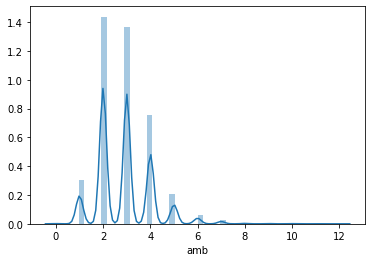

In [11]:
##columna de amb
amb_regex = re.compile(patron_amb, re.IGNORECASE)
resultado_amb = data['description'].apply(lambda x: amb_regex.search(x))
segresult_amb = resultado_amb.apply(lambda x: np.NaN if x is None else x[2]).astype(float)
segresult_amb[segresult_amb > 12] = np.NaN
data['amb'] = segresult_amb
print(data['amb'].value_counts())
p=sns.distplot(data['amb'])

2.0     17451
3.0     13637
1.0      7945
4.0      3610
5.0       624
6.0       112
0.0        37
7.0        36
8.0        30
10.0       27
9.0        23
11.0       11
12.0        9
Name: dorm, dtype: int64


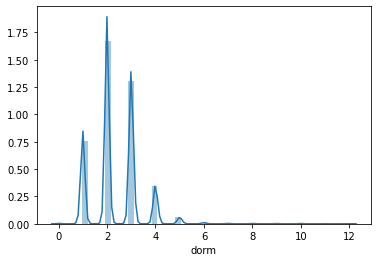

In [12]:
##columna de dorm
dorm_regex = re.compile(patron_dorm, re.IGNORECASE)
resultado_dorm = data['description'].apply(lambda x: dorm_regex.search(x))
segresult_dorm = resultado_dorm.apply(lambda x: np.NaN if x is None else x[2]).astype(float)
segresult_dorm[segresult_dorm > 12] = np.NaN
data['dorm'] = segresult_dorm
print(data['dorm'].value_counts())
p=sns.distplot(data['dorm'])

In [13]:
##columna de disp
disp_regex = re.compile(patron_disp, re.IGNORECASE)
resultado_disp = data['description'].apply(lambda x: disp_regex.search(x))
segresult_disp = resultado_disp.apply(lambda x: x if x is None else x[1])
segresult_disp.astype(str)
segresult_disp[segresult_disp.str.lower() == "frente"] = "1"
segresult_disp[segresult_disp.str.lower() == "fondo"] = "0"
segresult_disp[segresult_disp.str.lower() == "contrafrente"] = "0"
segresult_disp[segresult_disp.str.lower() == "interno"] = "0"
segresult_disp = segresult_disp.apply(lambda x: np.nan if x is None else x).astype(float)
data['disp'] = segresult_disp
print(data['disp'].value_counts())

1.0    32982
0.0    13743
Name: disp, dtype: int64


In [14]:
##columna de vista
vista_regex = re.compile(patron_vista, re.IGNORECASE)
resultado_vista = data['description'].apply(lambda x: vista_regex.search(x))
data['vista'] = resultado_vista.apply(lambda x: 0 if x is None else 1)
print(data['vista'].value_counts())

0    96828
1    24392
Name: vista, dtype: int64


In [15]:
##columna de piso
piso_regex = re.compile(patron_piso, re.IGNORECASE)
resultado_piso = data['description'].apply(lambda x: piso_regex.search(x))
data['piso'] = resultado_piso.apply(lambda x: x if x is None else x[0])
print(data['piso'].value_counts())

planta baja    8229
Planta Baja    3400
PLANTA BAJA    2802
2 planta       2464
Planta baja    1910
               ... 
55 piso           1
68 Piso           1
36 PISO           1
piso 90           1
PLANTA 1          1
Name: piso, Length: 810, dtype: int64


In [16]:
## COlumna de piso, limpieza con diccionario
repl_dict = {re.compile('1°|01|1er|primer', re.IGNORECASE): '1',
             re.compile('baja', re.IGNORECASE): '0',
             re.compile('2°|2do|segund', re.IGNORECASE): '2',
             re.compile('3°|3er|tercer', re.IGNORECASE): '3',
             re.compile('4°|4to|cuart', re.IGNORECASE): '4',
             re.compile('5°|5to|quint', re.IGNORECASE): '5',
             re.compile('6°|6to|sext', re.IGNORECASE): '6',
             re.compile('7°|7mo|s[eé]ptim', re.IGNORECASE): '7',
             re.compile('8°|8vo|octav', re.IGNORECASE): '8',
             re.compile('9°|9no|noven', re.IGNORECASE): '9',
             re.compile('10°|10mo|diez', re.IGNORECASE): '10',
             re.compile('11°|11ro|once', re.IGNORECASE): '11',
             re.compile('12°|12do|doce', re.IGNORECASE): '12',
             re.compile('13°|13ro|trece', re.IGNORECASE): '13',
             re.compile('14°|14to|catorce', re.IGNORECASE): '14',
             re.compile('15°|15to|quince', re.IGNORECASE): '15',
             re.compile('16°|16to|dieciseis', re.IGNORECASE): '16',
             re.compile('17°|17mo|diecisiete', re.IGNORECASE): '17',
             re.compile('18°|18mo|dieciocho', re.IGNORECASE): '18',
             re.compile('19°|19no|diecinueve', re.IGNORECASE): '19',
             re.compile('20°|20[mv]o|veinte', re.IGNORECASE): '20'}
data['piso2'] = data['piso'].replace(repl_dict, regex=True)
print(data['piso2'].sample(n=20))

41786     PLANTA 0
51146      2o piso
61930         None
1262          None
119064    planta 0
76635       1 PISO
15956         None
46159       6 piso
91602      10 piso
73412     Planta 0
106798        None
62101         None
37642         None
2644          None
111629        None
116205    Planta 0
86123      13 piso
67126     planta 0
6734          None
77123         None
Name: piso2, dtype: object


In [17]:
## COlumna de piso, limpieza con diccionario
repl_dict2 = {re.compile('\D', re.IGNORECASE): ''}
data['piso3'] = data['piso2'].replace(repl_dict2, regex=True)
print(data['piso3'])

0            0
1         None
2            3
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: piso3, Length: 121220, dtype: object


0         0.0
1         NaN
2         3.0
3         NaN
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218    NaN
121219    NaN
Name: piso3, Length: 121220, dtype: float64


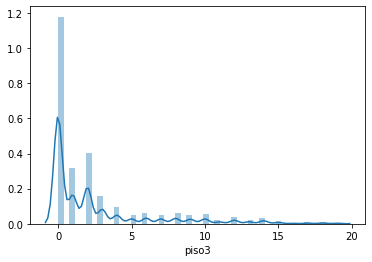

In [18]:
data['piso3'] = pd.to_numeric(data['piso3'], downcast='float')
data['piso3'] = data['piso3'].apply(lambda x: x if x < 20 else np.NaN)
print(data['piso3'])
p=sns.distplot(data['piso3'], kde=True)
#finalmente nos quedamos solo con la columna piso3, las otras fueron de trabajo

In [19]:
##columna de pozo
pozo_regex = re.compile(patron_pozo, re.IGNORECASE)
resultado_pozo = data['description'].apply(lambda x: pozo_regex.search(x))
data['pozo'] = resultado_pozo.apply(lambda x: 0 if x is None else 1)
print(data['pozo'].value_counts())

0    108193
1     13027
Name: pozo, dtype: int64


In [20]:
##columna de baulera
baulera_regex = re.compile(patron_baulera, re.IGNORECASE)
resultado_baulera = data['description'].apply(lambda x: baulera_regex.search(x))
data['baulera'] = resultado_baulera.apply(lambda x: 0 if x is None else 1)
print(data['baulera'].value_counts())

0    110425
1     10795
Name: baulera, dtype: int64


In [21]:
##columna de lavadero
lavadero_regex = re.compile(patron_lavadero, re.IGNORECASE)
resultado_lavadero = data['description'].apply(lambda x: lavadero_regex.search(x))
data['lavadero'] = resultado_lavadero.apply(lambda x: 0 if x is None else 1)
print(data['lavadero'].value_counts())

0    82891
1    38329
Name: lavadero, dtype: int64


In [22]:
##columna de garage
garage_regex = re.compile(patron_garage, re.IGNORECASE)
resultado_garage = data['description'].apply(lambda x: garage_regex.search(x))
data['garage'] = resultado_garage.apply(lambda x: 0 if x is None else 1)
print(data['garage'].value_counts())

0    67343
1    53877
Name: garage, dtype: int64


In [23]:
##columna de PH
PH_regex = re.compile(patron_PH, re.IGNORECASE)
resultado_PH = data['description'].apply(lambda x: PH_regex.search(x))
data['PH'] = resultado_PH.apply(lambda x: 0 if x is None else 1)
print(data['PH'].value_counts())

0    115207
1      6013
Name: PH, dtype: int64


In [24]:
##columna de precio
precio_regex = re.compile(patron_precio, re.IGNORECASE)
resultado_precio = data['description'].apply(lambda x: precio_regex.search(x))
data['precio'] = resultado_precio.apply(lambda x: x if x is None else x[0])
print(data['precio'].value_counts())

U$S 20.000     138
U$S 25.000     137
USD 120000     135
USD 130000     133
u$s20.000      114
              ... 
USD 330.000      1
u$s48.000        1
u$s 96.000       1
usd280.000       1
U$S 111.700      1
Name: precio, Length: 2972, dtype: int64


120000.0    255
130000.0    223
75000.0     212
110000.0    205
85000.0     202
           ... 
123552.0      1
123500.0      1
493910.0      1
297137.0      1
327779.0      1
Name: precio3, Length: 1017, dtype: int64


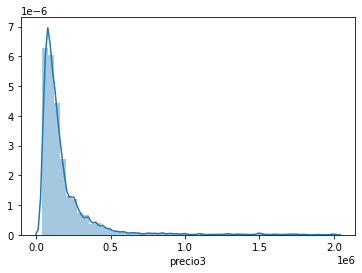

In [25]:
repl_dict3 = {re.compile('\,\d\d$|\.|\s', re.IGNORECASE): ''}
data['precio2'] = data['precio'].replace(repl_dict3, regex=True)
repl_dict4 = {re.compile('\D', re.IGNORECASE): ''}
data['precio3'] = data['precio2'].replace(repl_dict4, regex=True)
data['precio3'] = data['precio3'].astype(float)
data['precio3'] = data['precio3'].apply(lambda x: np.NaN if x > 2000000 else x)
data['precio3'] = data['precio3'].apply(lambda x: np.NaN if x < 40000 else x)
print(data['precio3'].value_counts())
p=sns.distplot(data['precio3'])
#Eliminadas las props de mas de 2 millones USD y menos de 40k USD

In [26]:
data.sample()
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'm2_new', 'amenities', 'portero', 'seguridad',
       'aptoprof', 'terraza', 'balcon', 'patio', 'amb', 'dorm', 'disp',
       'vista', 'piso', 'piso2', 'piso3', 'pozo', 'baulera', 'lavadero',
       'garage', 'PH', 'precio', 'precio2', 'precio3'],
      dtype='object')

In [27]:
#data.drop(["piso","piso2","precio","precio2"], axis=1).to_csv(r'Archivo_Ivan.csv')

In [28]:
mask_data_m2_null = data['surface_total_in_m2'].isnull()
print(mask_data_m2_null.value_counts())
mask_data_m2_null = data['surface_total_in_m2'].isnull()
data.loc[mask_data_m2_null,'m2_new'].isnull().value_counts()

False    81892
True     39328
Name: surface_total_in_m2, dtype: int64


True     30783
False     8545
Name: m2_new, dtype: int64

In [29]:
#creo nueva columna de m2 totales
data['m2_final'] = data['surface_total_in_m2']
mask_null_m2_final = data['surface_total_in_m2'].isnull()
data.loc[mask_null_m2_final, 'm2_final'] = data.loc[mask_null_m2_final,'m2_new']
data["m2_final"][data["m2_final"] > 800] = np.NaN
data['m2_final'].isnull().value_counts()
data[['surface_total_in_m2','m2_final','m2_new']].sample(20)
data['m2_final'].describe()



C:\Users\User\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count    87176.000000
mean       143.958337
std        148.359105
min          0.000000
25%         50.000000
50%         81.000000
75%        185.000000
max        800.000000
Name: m2_final, dtype: float64

In [30]:
#me fijo donde estan los nulls en la columna orifinal 'price_aprox_usd'
mask_null_precio_final = data['price_aprox_usd'].isnull()
data.loc[mask_null_precio_final,'precio3'].isnull().value_counts()
print(mask_null_precio_final.value_counts())
data.loc[mask_null_precio_final,'precio3'].isnull().value_counts()

False    100810
True      20410
Name: price_aprox_usd, dtype: int64


True     19991
False      419
Name: precio3, dtype: int64

In [31]:
#creo nueva columna de precio y reemplazo con valores encontradops por regex
data['precio_final'] = data['price_aprox_usd']
mask_null_precio_final = data['price_aprox_usd'].isnull()
data.loc[mask_null_precio_final, 'precio_final'] = data.loc[mask_null_precio_final,'precio3']
print(data['precio_final'].isnull().value_counts())
data[['price_aprox_usd','precio_final','precio3']].sample(20)

False    101229
True      19991
Name: precio_final, dtype: int64


,price_aprox_usd,precio_final,precio3
107119,NaN,NaN,NaN
4326,750000.0,750000.0,750000.0
75962,198495.0,198495.0,NaN
1107,NaN,NaN,NaN
32668,140000.0,140000.0,NaN
113933,114000.0,114000.0,NaN
83431,130000.0,130000.0,NaN
77461,230000.0,230000.0,NaN
114114,49000.0,49000.0,49000.0
17118,450000.0,450000.0,NaN


In [32]:
#me fijo donde estan los nulls en la columna orifinal 'floor'
mask_null_piso_final = data['floor'].isnull()
data.loc[mask_null_piso_final,'piso3'].isnull().value_counts()
print(mask_null_piso_final.value_counts())
data.loc[mask_null_piso_final,'piso3'].isnull().value_counts()

True     113321
False      7899
Name: floor, dtype: int64


True     79000
False    34321
Name: piso3, dtype: int64

In [33]:
#Hago reemplazo
data['piso_final'] = data['floor']
mask_null_piso_final = data['floor'].isnull()
data.loc[mask_null_piso_final, 'piso_final'] = data.loc[mask_null_piso_final,'piso3']
#A los que tienen mas dde 20 pisos los consideramos error y los cambiamos por NaN
mask_piso_max = data['piso_final'] > 20
data.loc[mask_piso_max,'piso_final'] = np.NaN
print(data['piso_final'].isnull().value_counts())
data[['floor','piso_final','piso3']].sample(20)

True     79265
False    41955
Name: piso_final, dtype: int64


,floor,piso_final,piso3
38089,NaN,NaN,NaN
94807,NaN,NaN,NaN
50642,NaN,NaN,NaN
58975,NaN,NaN,NaN
41073,NaN,NaN,NaN
15827,NaN,NaN,NaN
93587,NaN,NaN,NaN
103076,NaN,NaN,NaN
47957,NaN,0.0,0.0
59030,NaN,2.0,2.0


In [34]:
#me fijo donde estan los nulls en la columna orifinal 'rooms'
mask_null_amb_final = data['rooms'].isnull()
data.loc[mask_null_amb_final,'amb'].isnull().value_counts()
print('Los nulos en el orignal son:',mask_null_amb_final.sum())
data.loc[mask_null_amb_final,'amb'].isnull().value_counts()

Los nulos en el orignal son: 73830


True     54792
False    19038
Name: amb, dtype: int64

In [35]:
#Hago reemplazo
data['amb_final'] = data['rooms']
mask_null_amb_final = data['rooms'].isnull()
data.loc[mask_null_amb_final, 'amb_final'] = data.loc[mask_null_amb_final,'amb']
#A los que tienen mas dde 10 ambientes los consideramos error y los cambiamos por NaN
mask_piso_max = data['amb_final'] > 10
data.loc[mask_piso_max,'amb_final'] = np.NaN
print(data['amb_final'].isnull().value_counts())
data[['rooms','amb_final','amb']].sample(20)




False    66117
True     55103
Name: amb_final, dtype: int64


,rooms,amb_final,amb
69628,NaN,NaN,NaN
6367,3.0,3.0,3.0
104525,NaN,NaN,NaN
15644,3.0,3.0,3.0
87853,NaN,4.0,4.0
87841,NaN,NaN,NaN
24801,4.0,4.0,NaN
75633,NaN,NaN,NaN
80535,NaN,NaN,NaN
17840,2.0,2.0,2.0


In [36]:
#Recalculo de precio por metro cuadrado
mask_m2_final_not_null = data['m2_final'].notnull()
print(mask_m2_final_not_null.sum())


87176


In [37]:
data['precio_por_m2_final'] = data['price_per_m2']
data.loc[mask_m2_final_not_null,'precio_por_m2_final'] = data.loc[mask_m2_final_not_null,'precio_final']/data.loc[mask_m2_final_not_null,'m2_final']
mask_condicion_precio_m2 = np.logical_or(data['precio_por_m2_final'] < 500 , data['precio_por_m2_final']>7000)
#reemplazo los que no cumplen la condicion por np.NaN
data.loc[mask_condicion_precio_m2,'precio_por_m2_final'] = np.NaN


In [38]:
#Primero elimino las barras al inicio y al final de los registros
import re

patron_1 = '^\|+'
patron_2 = '\|+$'
regex_1 = re.compile(patron_1)
regex_2= re.compile(patron_2)

place_with_parent_names_sin_barras_al_inicio = data['place_with_parent_names'].apply(lambda x: regex_1.sub('',x) )
place_with_parent_names_sin_barras_al_inicio_ni_al_final = place_with_parent_names_sin_barras_al_inicio.apply(lambda x :regex_2.sub('',x) )
place_with_parent_names_sin_barras_al_inicio_ni_al_final

place_with_parent_names_SERIE = place_with_parent_names_sin_barras_al_inicio_ni_al_final.apply(lambda x: x.split('|'))
print(place_with_parent_names_SERIE)

place_with_parent_names_SERIE.index

#Pais = place_with_parent_names_SERIE.apply(lambda x : x[i][0] for i in place_with_parent_names_SERIE.index)
type(place_with_parent_names_SERIE[0])


0                   [Argentina, Capital Federal, Mataderos]
1             [Argentina, Bs.As. G.B.A. Zona Sur, La Plata]
2                   [Argentina, Capital Federal, Mataderos]
3                     [Argentina, Capital Federal, Liniers]
4         [Argentina, Buenos Aires Costa Atlántica, Mar ...
                                ...                        
121215               [Argentina, Capital Federal, Belgrano]
121216    [Argentina, Bs.As. G.B.A. Zona Norte, San Isid...
121217          [Argentina, Capital Federal, Villa Urquiza]
121218    [Argentina, Buenos Aires Costa Atlántica, Mar ...
121219                         [Argentina, Capital Federal]
Name: place_with_parent_names, Length: 121220, dtype: object


list

In [39]:
#Creo una lista para despues pasarlo a un DataFrame
lista=list(place_with_parent_names_SERIE)
data_lugares = pd.DataFrame(lista,columns=['Pais','Provincia','Ciudad','Zona','Barrio'])
print(data_lugares)
print(data_lugares['Ciudad'].isnull().value_counts())



             Pais                     Provincia         Ciudad         Zona  \
0       Argentina               Capital Federal      Mataderos         None   
1       Argentina        Bs.As. G.B.A. Zona Sur       La Plata         None   
2       Argentina               Capital Federal      Mataderos         None   
3       Argentina               Capital Federal        Liniers         None   
4       Argentina  Buenos Aires Costa Atlántica  Mar del Plata       Centro   
...           ...                           ...            ...          ...   
121215  Argentina               Capital Federal       Belgrano         None   
121216  Argentina      Bs.As. G.B.A. Zona Norte     San Isidro       Beccar   
121217  Argentina               Capital Federal  Villa Urquiza         None   
121218  Argentina  Buenos Aires Costa Atlántica  Mar del Plata  Plaza Colón   
121219  Argentina               Capital Federal           None         None   

       Barrio  
0        None  
1        None  
2  

In [40]:
#De los null que hay en la columna ciudad, busco sus respectivos datos en la columna 'title'
print('Los registros nulls en la columna Ciudad son:',data_lugares['Ciudad'].isnull().sum())
#De esos nulls busco en la columna title si tengo alguna informacion
mask_null_ciudad = data_lugares['Ciudad'].isnull()
data.loc[mask_null_ciudad,'title'].value_counts()

Los registros nulls en la columna Ciudad son: 4780


Departamento - Nueva Cordoba                                                1001
Departamento en P.Chacabuco                                                  237
Departamento en Nueva Cordoba                                                 87
Departamento - Capital                                                        70
CASA EN VENTA                                                                 60
                                                                            ... 
DEPARTAMENTO VENTA NUEVA CORDOBA -CON RENTA                                    1
Casa 577m² con Dependencias, Argentina, Capital Federal, por U$S 630.000       1
Casa 880m² con Teléfono, Argentina, Capital Federal, por U$S 415.000           1
Casa 600m² con 3 Plantas, Argentina, Capital Federal, por U$S 365.000          1
***Piso de lujo fte Plaza España***                                            1
Name: title, Length: 2533, dtype: int64

In [41]:
#localizo los indices de los titles que dicen Departamento - Nueva Cordoba o Departamento en Nueva Cordoba
mask_nueva_cordoba = np.logical_or(data['title'] == 'Departamento - Nueva Cordoba',data['title']=='Departamento en Nueva Cordoba')
#reemplazo en los null en 'Zona' por esos valores
data_lugares.loc[mask_nueva_cordoba,'Zona'] = 'Nueva Cordoba'

In [42]:
#localizo los indices de los titles que dicen Departamento en P.Chacabuco
mask_chacabuco = data['title'] == 'Departamento en P.Chacabuco'
data_lugares.loc[mask_chacabuco,'Ciudad'] = 'P.Chacabuco'
data_lugares[mask_chacabuco].head()

,Pais,Provincia,Ciudad,Zona,Barrio
68792,Argentina,Capital Federal,P.Chacabuco,None,None
68802,Argentina,Capital Federal,P.Chacabuco,None,None
68813,Argentina,Capital Federal,P.Chacabuco,None,None
68821,Argentina,Capital Federal,P.Chacabuco,None,None
68835,Argentina,Capital Federal,P.Chacabuco,None,None


In [43]:
#Reemplazo todos los nulls que quedan en 'Ciudad' por su respectivo valor de la columna 'Provincia'
mask_null_ciudad= data_lugares['Ciudad'].isnull()
print(mask_null_ciudad.sum())
data['Ciudad_final'] = data_lugares['Ciudad']
print('La cantidad inicial de nulos en la columna ciudad es:',data['Ciudad_final'].isnull().sum())

data_lugares['Ciudad_final'] = data_lugares['Ciudad']
mask_ciudad_null = data_lugares['Ciudad'].isnull()
data_lugares.loc[mask_ciudad_null,'Ciudad_final'] = data_lugares.loc[mask_ciudad_null,'Provincia']

data[['Pais','Provincia','Ciudad','Zona','Barrio']] = data_lugares[['Pais','Provincia','Ciudad_final','Zona','Barrio']]


data[['Pais','Provincia','Ciudad','Zona','Barrio']]





4543
La cantidad inicial de nulos en la columna ciudad es: 4543


,Pais,Provincia,Ciudad,Zona,Barrio
0,Argentina,Capital Federal,Mataderos,None,None
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None
2,Argentina,Capital Federal,Mataderos,None,None
3,Argentina,Capital Federal,Liniers,None,None
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None
...,...,...,...,...,...
121215,Argentina,Capital Federal,Belgrano,None,None
121216,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,None
121217,Argentina,Capital Federal,Villa Urquiza,None,None
121218,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,None


In [44]:
mask_null_lugares=data_lugares['Ciudad'].isnull()

mask_null_lugares.sum()

4543

In [45]:
mask_null_latlon=data['lat-lon'].isnull()

mask_null_latlon.sum()

51550

In [46]:
data.sample()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [47]:
data['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [48]:
data.drop(['operation','place_name','place_with_parent_names','country_name','geonames_id','lat','price','currency','price_aprox_local_currency','price_aprox_usd',
          'surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','floor','rooms','properati_url','image_thumbnail',
         'm2_new','piso','piso2','piso3','precio','precio2','precio3' ],axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           121220 non-null  int64  
 1   property_type        121220 non-null  object 
 2   state_name           121220 non-null  object 
 3   lat-lon              69670 non-null   object 
 4   lon                  69670 non-null   float64
 5   expenses             14262 non-null   float64
 6   description          121220 non-null  object 
 7   title                121220 non-null  object 
 8   amenities            121220 non-null  int64  
 9   portero              121220 non-null  int64  
 10  seguridad            121220 non-null  int64  
 11  aptoprof             121220 non-null  int64  
 12  terraza              121220 non-null  int64  
 13  balcon               121220 non-null  int64  
 14  patio                121220 non-null  int64  
 15  amb              

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           121220 non-null  int64  
 1   property_type        121220 non-null  object 
 2   state_name           121220 non-null  object 
 3   lat-lon              69670 non-null   object 
 4   lon                  69670 non-null   float64
 5   expenses             14262 non-null   float64
 6   description          121220 non-null  object 
 7   title                121220 non-null  object 
 8   amenities            121220 non-null  int64  
 9   portero              121220 non-null  int64  
 10  seguridad            121220 non-null  int64  
 11  aptoprof             121220 non-null  int64  
 12  terraza              121220 non-null  int64  
 13  balcon               121220 non-null  int64  
 14  patio                121220 non-null  int64  
 15  amb              

In [51]:




data.drop(columns='Unnamed: 0',inplace=True)


In [52]:
data.info()

data.drop(['state_name','lon'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   property_type        121220 non-null  object 
 1   state_name           121220 non-null  object 
 2   lat-lon              69670 non-null   object 
 3   lon                  69670 non-null   float64
 4   expenses             14262 non-null   float64
 5   description          121220 non-null  object 
 6   title                121220 non-null  object 
 7   amenities            121220 non-null  int64  
 8   portero              121220 non-null  int64  
 9   seguridad            121220 non-null  int64  
 10  aptoprof             121220 non-null  int64  
 11  terraza              121220 non-null  int64  
 12  balcon               121220 non-null  int64  
 13  patio                121220 non-null  int64  
 14  amb                  37732 non-null   float64
 15  dorm             

In [53]:
data.drop(['amb','Ciudad_final'],axis=1)


data.rename(columns={ 'property_type': 'Tipo_Propiedad',
                    'expenses': 'Expensas',
                    'm2_final': 'Total_M2',
                    'precio_final': 'Precio_USD',
                    'piso_final': 'Nro_Piso',
                    'amb_final': 'Nro_Ambientes',
                    'precio_por_m2_final': 'Precio_M2',
                    'title':'Titulo',                     
                    }, inplace=True)

In [54]:
data.drop(columns='Ciudad_final',inplace=True)

In [55]:
data.drop(columns='amb',inplace=True)

In [56]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Tipo_Propiedad  121220 non-null  object 
 1   lat-lon         69670 non-null   object 
 2   Expensas        14262 non-null   float64
 3   description     121220 non-null  object 
 4   Titulo          121220 non-null  object 
 5   amenities       121220 non-null  int64  
 6   portero         121220 non-null  int64  
 7   seguridad       121220 non-null  int64  
 8   aptoprof        121220 non-null  int64  
 9   terraza         121220 non-null  int64  
 10  balcon          121220 non-null  int64  
 11  patio           121220 non-null  int64  
 12  dorm            43552 non-null   float64
 13  disp            46725 non-null   float64
 14  vista           121220 non-null  int64  
 15  pozo            121220 non-null  int64  
 16  baulera         121220 non-null  int64  
 17  lavadero  

In [57]:
data.describe()

,Expensas,amenities,portero,seguridad,aptoprof,terraza,balcon,patio,dorm,disp,...,pozo,baulera,lavadero,garage,PH,Total_M2,Precio_USD,Nro_Piso,Nro_Ambientes,Precio_M2
count,1.426200e+04,121220.000000,121220.000000,121220.000000,121220.000000,121220.000000,121220.000000,121220.000000,43552.000000,46725.000000,...,121220.000000,121220.000000,121220.000000,121220.000000,121220.000000,87176.000000,1.012290e+05,41955.000000,66117.000000,84667.000000
mean,5.009234e+03,0.219922,0.031909,0.023354,0.040728,0.226934,0.355874,0.290241,2.369306,0.705875,...,0.107466,0.089053,0.316194,0.444456,0.049604,143.958337,2.395705e+05,2.642784,2.989579,2023.626616
std,1.204403e+05,0.414196,0.175758,0.151026,0.197659,0.418852,0.478779,0.453875,1.008154,0.455653,...,0.309706,0.284821,0.464991,0.496907,0.217126,148.359105,3.907435e+05,3.694350,1.469649,986.509886
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,500.000000
25%,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,8.973388e+04,0.000000,2.000000,1352.941176
50%,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,1.450000e+05,1.000000,3.000000,1860.465116
75%,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,185.000000,2.650000e+05,3.000000,4.000000,2485.714286
max,1.000150e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,800.000000,4.654544e+07,20.000000,10.000000,7000.000000


In [58]:
print(data[['Ciudad','Precio_M2','Total_M2','Precio_USD']][data['Precio_M2']>6000])

                 Ciudad    Precio_M2  Total_M2  Precio_USD
252       Puerto Madero  6035.353535     198.0   1195000.0
381       Puerto Madero  6481.481481      54.0    350000.0
400       Puerto Madero  6481.481481      54.0    350000.0
401       Puerto Madero  6111.111111      54.0    330000.0
525          San Isidro  6111.111111       NaN  11000000.0
...                 ...          ...       ...         ...
119931       Avellaneda  6250.000000       NaN    125000.0
119956       Avellaneda  6400.000000       NaN    128000.0
119987  Capital Federal  6285.714286     175.0   1100000.0
121093          Palermo  6888.888889      90.0    620000.0
121100          Palermo  6888.888889      90.0    620000.0

[593 rows x 4 columns]


In [59]:
data.to_csv(r'Archivo_OK.csv')

<AxesSubplot:>

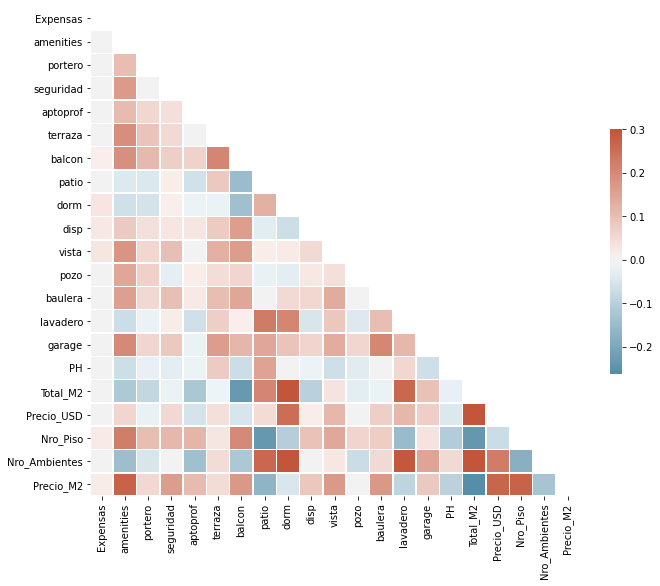

In [60]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
print('El porcentaje de datos nulos de cada columna es:\n\n',(data.isnull().sum()/data.shape[0]*100 ).round(2))

El porcentaje de datos nulos de cada columna es:

 Tipo_Propiedad     0.00
lat-lon           42.53
Expensas          88.23
description        0.00
Titulo             0.00
amenities          0.00
portero            0.00
seguridad          0.00
aptoprof           0.00
terraza            0.00
balcon             0.00
patio              0.00
dorm              64.07
disp              61.45
vista              0.00
pozo               0.00
baulera            0.00
lavadero           0.00
garage             0.00
PH                 0.00
Total_M2          28.08
Precio_USD        16.49
Nro_Piso          65.39
Nro_Ambientes     45.46
Precio_M2         30.15
Pais               0.00
Provincia          0.00
Ciudad             0.00
Zona              65.76
Barrio            99.55
dtype: float64


In [62]:
print('El porcentaje de datos nulos de cada columna es:\n\n',(data_original.isnull().sum()/data_original.shape[0]*100 ).round(2))

El porcentaje de datos nulos de cada columna es:

 Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
dtype: float6

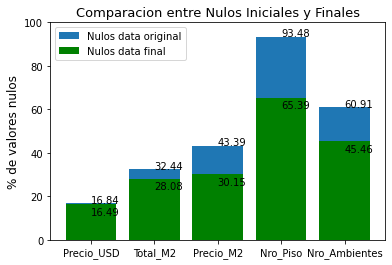

In [63]:
#PLOTEO DE DATOS NULOS ORIGINALES VS FINALES

#Defino mis conjuntos de datos
datos = ['Precio_USD','Total_M2','Precio_M2','Nro_Piso','Nro_Ambientes']
porcentaje_nulos_originales = [16.84,32.44,43.39,93.48,60.91]
porcentaje_nulos_finales = [16.49,28.08,30.15,65.39,45.46]

#Creo barras para mi primer conjunto de datos (originales)
plt.bar(datos,porcentaje_nulos_originales,align = 'center')

#Creo barras para mi segundo conjunto de datos (finales)
plt.bar(datos,porcentaje_nulos_finales,color='g',align = 'center')

#Doy titulo a la grafica
plt.title('Comparacion entre Nulos Iniciales y Finales',size=13)

#Incluyo la leyenda
plt.legend(['Nulos data original','Nulos data final'])

#Defino el titulo de mi eje y
plt.ylabel('% de valores nulos',size=12)

#Defino valor minimo y maximo del eje y
plt.ylim((0,100))

#Pongo los datos junto a las barras
for datos , porcentaje_nulos_originales in enumerate(porcentaje_nulos_originales):
    plt.text(datos , porcentaje_nulos_originales,str(porcentaje_nulos_originales))
    
    
for datos , porcentaje_nulos_finales in enumerate(porcentaje_nulos_finales):
    plt.text(datos , porcentaje_nulos_finales-5,str(porcentaje_nulos_finales))




In [64]:
data_original.shape

(121220, 26)

In [65]:
data.shape

(121220, 30)

In [66]:
data.columns

Index(['Tipo_Propiedad', 'lat-lon', 'Expensas', 'description', 'Titulo',
       'amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'dorm', 'disp', 'vista', 'pozo', 'baulera', 'lavadero',
       'garage', 'PH', 'Total_M2', 'Precio_USD', 'Nro_Piso', 'Nro_Ambientes',
       'Precio_M2', 'Pais', 'Provincia', 'Ciudad', 'Zona', 'Barrio'],
      dtype='object')

In [67]:
data_original.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [68]:
#TABLA PARA IDENTIFICAR COLUMNAS RENOMBRADAS, DROPEADAS O QUE QUEDARON IGUALES

columnas_data_original=data_original.columns
nuevas_columnas= ['Drop','Drop','Tipo de Propiedad','Ciudad','Drop','Pais','Provincia','Drop','Igual',
                 'Drop','Drop','Drop','Drop','Drop','Precio_USD','Total_M2','Drop','Precio_M2','Drop','Nro_Piso','Nro_Ambientes',
                 'Expensas','Drop','Igual','Titulo','Drop']

dataFrame_columnas= pd.DataFrame(nuevas_columnas, index=[columnas_data_original], columns = ['Nuevo Nombre / Igual / Dropeada'])

dataFrame_columnas



,Nuevo Nombre / Igual / Dropeada
Unnamed: 0,Drop
operation,Drop
property_type,Tipo de Propiedad
place_name,Ciudad
place_with_parent_names,Drop
country_name,Pais
state_name,Provincia
geonames_id,Drop
lat-lon,Igual
lat,Drop


In [69]:
ejemplo = data.groupby('Provincia')['Precio_M2'].mean().sort_values(ascending = False)
ejemplo

Provincia
Catamarca                       3313.454436
Jujuy                           2761.116855
Capital Federal                 2578.654564
San Juan                        2390.263431
Río Negro                       2100.146609
Neuquén                         1984.631578
Bs.As. G.B.A. Zona Norte        1981.197582
Buenos Aires Costa Atlántica    1754.514295
Santa Fe                        1698.292663
Chubut                          1669.230358
Bs.As. G.B.A. Zona Sur          1644.115125
Mendoza                         1623.467424
Buenos Aires Interior           1596.568640
San Luis                        1570.247032
Bs.As. G.B.A. Zona Oeste        1569.600094
Chaco                           1532.427077
Corrientes                      1530.496411
Formosa                         1509.648462
La Pampa                        1449.096425
Córdoba                         1430.553961
Misiones                        1376.734671
Tierra Del Fuego                1375.503560
Entre Ríos            

In [70]:
mask = data['Ciudad']=='Capilla del Rosario'
data.loc[mask]


,Tipo_Propiedad,lat-lon,Expensas,description,Titulo,amenities,portero,seguridad,aptoprof,terraza,...,Total_M2,Precio_USD,Nro_Piso,Nro_Ambientes,Precio_M2,Pais,Provincia,Ciudad,Zona,Barrio
24831,house,"-32.9045828826,-68.7649564276",NaN,"GAS, CLOACAS, PAVIMENTO.- CASA UBICADA EN LAS...",CASA BARRIO SANTA ANA,0,0,0,0,0,...,160.0,700000.0,NaN,5.0,4375.0,Argentina,Mendoza,Capilla del Rosario,None,None


In [71]:
#FILTRO 1 o 0 PARA IDENTIFICAR PROVINCIAS CON DATOS MAYORES A 50 (1 cumple condicion, 0 no cumple condicion)

#me armo una mascara que filtre solo las provincias que tienen mas de 50 registros
mask = data['Provincia'].value_counts()>50
#De esa mascara me quedo solo con los TRUE y con el indice, que son las provincias que cumplen la condicion
provincia_con_datos_mayores_a_50 = mask[mask].index
#Convierto la Serie data['Provincia'] en una lista
data_provincia = list(data['Provincia'])

#Me armo una lista vacia para apendear con 0 y 1 (1 si la provincia cumple la condicion de tener mas de 50 registros y 0 si no la cumple)

valor_1_0 = []
for provincia in data_provincia:
    if provincia in provincia_con_datos_mayores_a_50:
        valor_1_0.append(1)
    else:
        valor_1_0.append(0)

#agrego al data set la lista        
data['valor_1_0']=valor_1_0
data['valor_1_0'].value_counts()

#Verifico que los que los valores 0 correspondan a las provincias que no cumplian la condicion (Tenian False en la mask)
data.loc[data['valor_1_0']==0,'Provincia'].value_counts()
            


San Juan               40
Tierra Del Fuego       31
Catamarca              27
Jujuy                  26
Santa Cruz             20
Santiago Del Estero     4
La Rioja                4
Name: Provincia, dtype: int64

In [72]:
#FILTRO 1 o 0 PARA IDENTIFICAR PROVINCIAS CON DATOS MAYORES A 50 (1 cumple condicion, 0 no cumple condicion)

#me armo una mascara que filtre solo las provincias que tienen mas de 50 registros
mask = data['Provincia'].value_counts()>4000
#De esa mascara me quedo solo con los TRUE y con el indice, que son las provincias que cumplen la condicion
provincia_con_datos_mayores_a_50 = mask[mask].index
#Convierto la Serie data['Provincia'] en una lista
data_provincia = list(data['Provincia'])

#Me armo una lista vacia para apendear con 0 y 1 (1 si la provincia cumple la condicion de tener mas de 50 registros y 0 si no la cumple)

valor_1_0 = []
for provincia in data_provincia:
    if provincia in provincia_con_datos_mayores_a_50:
        valor_1_0.append(1)
    else:
        valor_1_0.append(0)

#agrego al data set la lista        
data['valor_1_0']=valor_1_0
data['valor_1_0'].value_counts()

#Verifico que los que los valores 0 correspondan a las provincias que no cumplian la condicion (Tenian False en la mask)
data.loc[data['valor_1_0']==0,'Provincia'].value_counts()



Buenos Aires Interior    2291
Río Negro                 808
Neuquén                   733
Mendoza                   681
Tucumán                   674
Corrientes                583
Misiones                  464
Entre Ríos                369
Salta                     278
Chubut                    259
San Luis                  252
La Pampa                  157
Formosa                    65
Chaco                      57
San Juan                   40
Tierra Del Fuego           31
Catamarca                  27
Jujuy                      26
Santa Cruz                 20
La Rioja                    4
Santiago Del Estero         4
Name: Provincia, dtype: int64

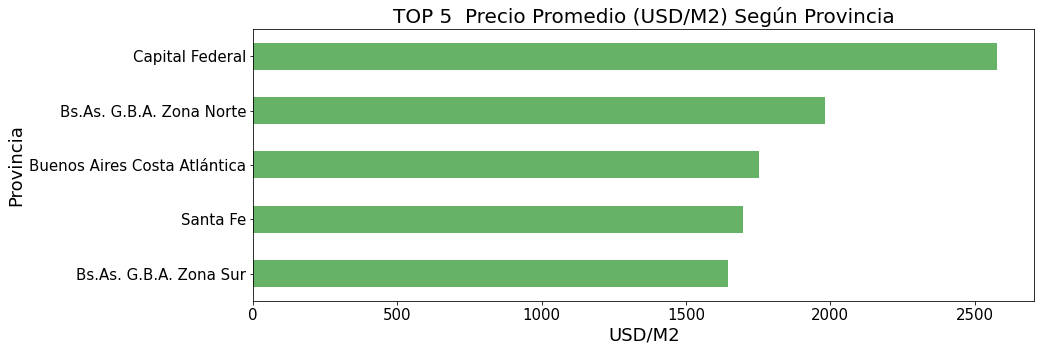

In [73]:
#PLOTEO DE DATOS TOP 5 PRECIO PROMEDIO USD/M2 SEGUN PROVINCIA
#Selecciono la data cuyos registros sean mayor a x numero. Dicha condicion se ve reflejada en la columna 'valor_1_0' (1 si cumple condicion, 0 si no lo cumple)
data_provincia_mayor_a_50_registros = data.loc[data['valor_1_0']==1]
data_provincia_mayor_a_50_registros
dfzone = data_provincia_mayor_a_50_registros.groupby('Provincia').mean()['Precio_M2'].sort_values(ascending = False)[0:5]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='g',fontsize = 15, alpha = 0.6)
g.set_title('TOP 5  Precio Promedio (USD/M2) Según Provincia',fontsize=20)
g.set_ylabel('Provincia', fontsize=18)
g.set_xlabel('USD/M2', fontsize=18)
plt.show()

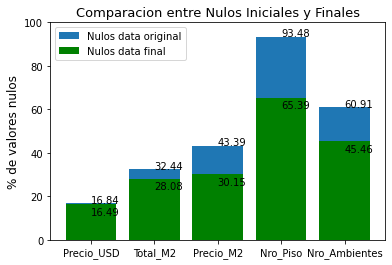

In [74]:
#PLOTEO DE DATOS NULOS ORIGINALES VS FINALES

#Defino mis conjuntos de datos
datos = ['Precio_USD','Total_M2','Precio_M2','Nro_Piso','Nro_Ambientes']
porcentaje_nulos_originales = [16.84,32.44,43.39,93.48,60.91]
porcentaje_nulos_finales = [16.49,28.08,30.15,65.39,45.46]

#Creo barras para mi primer conjunto de datos (originales)
plt.bar(datos,porcentaje_nulos_originales,align = 'center')

#Creo barras para mi segundo conjunto de datos (finales)
plt.bar(datos,porcentaje_nulos_finales,color='g',align = 'center')

#Doy titulo a la grafica
plt.title('Comparacion entre Nulos Iniciales y Finales',size=13)

#Incluyo la leyenda
plt.legend(['Nulos data original','Nulos data final'])

#Defino el titulo de mi eje y
plt.ylabel('% de valores nulos',size=12)

#Defino valor minimo y maximo del eje y
plt.ylim((0,100))

#Pongo los datos junto a las barras
for datos , porcentaje_nulos_originales in enumerate(porcentaje_nulos_originales):
    plt.text(datos , porcentaje_nulos_originales,str(porcentaje_nulos_originales))
    
    
for datos , porcentaje_nulos_finales in enumerate(porcentaje_nulos_finales):
    plt.text(datos , porcentaje_nulos_finales-5,str(porcentaje_nulos_finales))



In [75]:
#Contedo de columnas nuevas y modificadas

columnas_originales = data_original.shape[1]
print('El numero de columnas originales es:',columnas_originales)
columnas_finales = data.shape[1]
print('El numero de columnas finales es:',columnas_finales)
columnas_dropeadas = dataFrame_columnas['Nuevo Nombre / Igual / Dropeada']=='Drop'
print('El numero de columnas dropeadas es:',columnas_dropeadas.sum())
columnas_conservan_nombre = dataFrame_columnas['Nuevo Nombre / Igual / Dropeada']=='Igual'
print('El numero de columnas que conservan el mismo nombre es:',columnas_conservan_nombre.sum())
columnas_renombradas = columnas_originales - columnas_dropeadas.sum()-columnas_conservan_nombre.sum()
print('El numero de columnas renombradas es:',columnas_renombradas)
columnas_nuevas = columnas_finales - columnas_conservan_nombre.sum() - columnas_renombradas
print('El numero de columnas nuevas es:',columnas_nuevas)





El numero de columnas originales es: 26
El numero de columnas finales es: 31
El numero de columnas dropeadas es: 13
El numero de columnas que conservan el mismo nombre es: 2
El numero de columnas renombradas es: 11
El numero de columnas nuevas es: 18


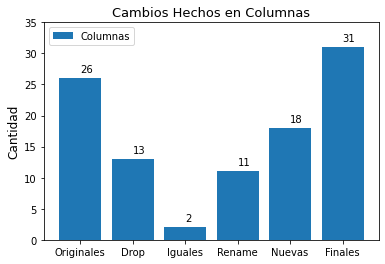

In [76]:
#PLOTEO MODIFICACION EN COLUMNAS

#Defino mis conjuntos de datos
columnas = ['Originales','Drop','Iguales','Rename','Nuevas','Finales']
cantidad = [columnas_originales,columnas_dropeadas.sum(),columnas_conservan_nombre.sum(),columnas_renombradas,columnas_nuevas,columnas_finales]


#Creo barras para mi primer conjunto de datos (originales)
plt.bar(columnas,cantidad,align = 'center')


#Doy titulo a la grafica
plt.title('Cambios Hechos en Columnas',size=13)

#Incluyo la leyenda
plt.legend(['Columnas'],loc=2)

#Defino el titulo de mi eje y
plt.ylabel('Cantidad',size=12)

#Defino valor minimo y maximo del eje y
plt.ylim((0,35))

#Pongo los datos junto a las barras
for columnas , cantidad in enumerate(cantidad):
    plt.text(columnas , cantidad+1,str(cantidad))
    
    


In [77]:
#Visualizacion de columnas nuevas
Columnas_nuevas =pd.DataFrame(['amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'dorm', 'disp', 'vista', 'pozo', 'baulera', 'lavadero',
       'garage', 'PH','Zona', 'Barrio',
       'valor_1_0'],index=[i+1 for i in range(columnas_nuevas)] ,columns=['Columnas Nuevas'])
Columnas_nuevas

,Columnas Nuevas
1,amenities
2,portero
3,seguridad
4,aptoprof
5,terraza
6,balcon
7,patio
8,dorm
9,disp
10,vista


In [78]:
data.columns

Index(['Tipo_Propiedad', 'lat-lon', 'Expensas', 'description', 'Titulo',
       'amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'dorm', 'disp', 'vista', 'pozo', 'baulera', 'lavadero',
       'garage', 'PH', 'Total_M2', 'Precio_USD', 'Nro_Piso', 'Nro_Ambientes',
       'Precio_M2', 'Pais', 'Provincia', 'Ciudad', 'Zona', 'Barrio',
       'valor_1_0'],
      dtype='object')

In [79]:
#Calculo de Valores nuevos gracias a REGEX
valores_nuevos_gracias_a_REGEX = data.shape[0]*(porcentaje_nulos_originales/100-porcentaje_nulos_finales/100)
print(valores_nuevos_gracias_a_REGEX)


18728.489999999998


In [80]:
data.shape[0]

121220

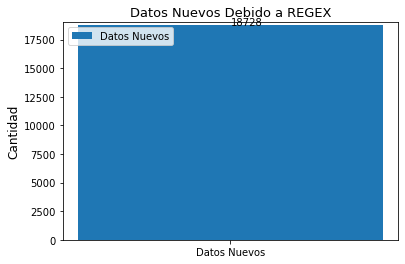

In [81]:
#PLOTEO DATOS NUEVOS DEBIDO A REGEX

#Defino mis conjuntos de datos
columnas = ['Datos Nuevos']
cantidad = [18728]


#Creo barras para mi primer conjunto de datos (originales)
plt.bar(columnas,cantidad,align = 'center',width = [0.1])


#Doy titulo a la grafica
plt.title('Datos Nuevos Debido a REGEX',size=13)

#Incluyo la leyenda
plt.legend(['Datos Nuevos'],loc=2)

#Defino el titulo de mi eje y
plt.ylabel('Cantidad',size=12)

#Defino valor minimo y maximo del eje y
plt.ylim((0,19000))

#Pongo los datos junto a las barras
for columnas , cantidad in enumerate(cantidad):
    plt.text(columnas , cantidad+1,str(cantidad))

<AxesSubplot:>

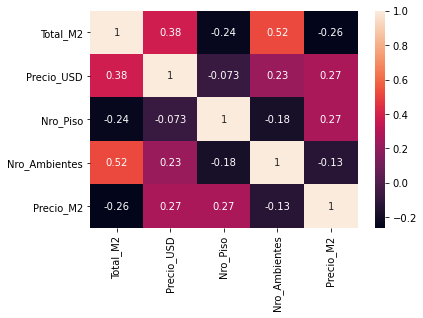

In [89]:
sns.heatmap(data[['Total_M2', 'Precio_USD', 'Nro_Piso', 'Nro_Ambientes',
       'Precio_M2']].corr(),annot=True)

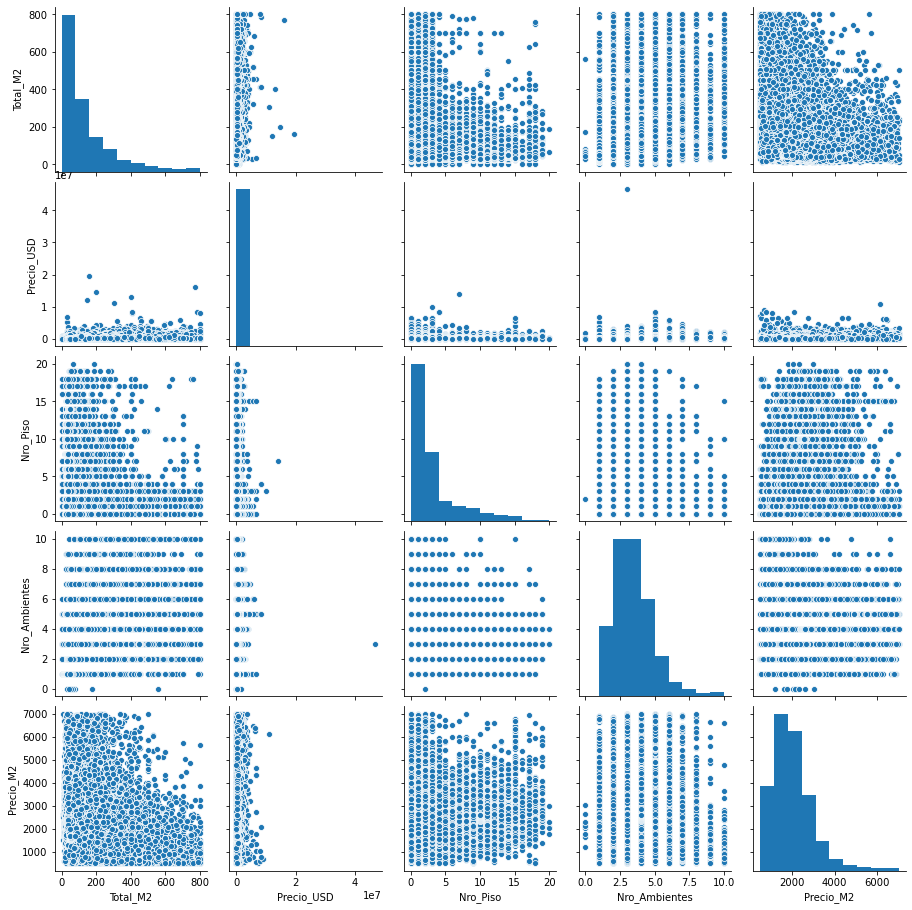

In [91]:
sns.pairplot(data[['Total_M2', 'Precio_USD', 'Nro_Piso', 'Nro_Ambientes',
       'Precio_M2']])